# Engineering Analytics and Machine Learning Lab 7
## for Specialist Diploma in Internet of Things

### Author’s Name: Teo Kok Keong

### Property of Temasek Polytechnic, Copyright ©.
### For circulation within Temasek Polytechnic only.



# 1 Introduction to Tensorflow

TensorFlow™ is an open source software library for high performance numerical computation. Its flexible architecture allows easy deployment of computation across a variety of platforms (CPUs, GPUs, TPUs), and from desktops to clusters of servers to mobile and edge devices. Originally developed by researchers and engineers from the Google Brain team within Google’s AI organization, it comes with strong support for machine learning and deep learning and the flexible numerical computation core is used across many other scientific domains.

You can access link below the access the official site:

[https://www.tensorflow.org/](https://www.tensorflow.org/)


## 1.1 Basic Tensorflow  Operation




In [1]:
import tensorflow as tf

x=tf.Variable(3,name='x')
y=tf.Variable(4,name='y')
a=tf.constant(6,name='a')
f=x*x*y+y+a
print(f)

Tensor("add_1:0", shape=(), dtype=int32)


We would expect the last command to print the value "46" but that doesn't seem to happen. What all these lines of code only did is create the Tensorflow graphs. Or just reserve memory location for all the variables, constant and the computation. In order to execute the graph, we need to create a new sesion and close the session (free up resource) when done.

In [2]:
sess=tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result=sess.run(f)
print(result)
sess.close()

46


As we can see the above codes create a new session call "sess" and sess.run() is call to initize x, y with the value specified during declaration. Having to keep writing sess is pretty cumbersome. A better way is to use with where within the block the session is set as the default without needing to keep repeating sess, also this code is also more readable. Furthermore the session is close automatically at the end of the block. The code is as shown below: 

In [3]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result=f.eval()
print(result)

46


Instead of manually running the initializer for every single variable, we could use the global_variables_initializerr() method. Note that it does not actually perform the initialization immediately, but rather create a node in the graph that will initialize all variable when it is run. Example:

In [4]:
init=tf.global_variables_initializer()  #prepare an init node
with tf.Session() as sess:  
    init.run()      #actual initialization of all the variables
    result=f.eval()
print(result)

46


we can evaluate multiple variable at the same time as shown below:

In [5]:
w=tf.constant(3)
x=w+2
y=x+5
z=x+3
with tf.Session() as sess:
    y_val,z_val=sess.run([y,z])
print(y_val)
print(z_val)


10
8


## Exercise 1

Create the Tensorflow graph f=ax+b wherre a and b are constant, x is variable. 
Initializer a=5,b=3,x=2 and evaluate the result of f. Name variable x as "x-variable"", constant a as "slope", constant b as "yintercept"

In [6]:
import tensorflow as tf

x=tf.Variable(2,name='x-variable')
a=tf.constant(5,name='slope')
b=tf.constant(3,name='yintercept')
init=tf.global_variables_initializer()  #prepare an init node
with tf.Session() as sess:
    init.run()
    result=f.eval()
print(result)
    

46


Any node created would be automatically added to the default graph:

In [7]:
x1=tf.Variable(1)
x1.graph is tf.get_default_graph()   #test whether x1 bellow to the default graph

True

In most case, we would want to any node to be connected to the default graph. However in some cases we may want to manage multiple independent graphs. Lets take a look:

In [8]:
graph=tf.Graph()  #create a new graph which is not the default graph
with graph.as_default():
    x2=tf.Variable(2)
print(x2.graph is graph) #test if x2 belong to graph call "graph"
print(x2.graph is tf.get_default_graph())  #test if x2 belong to the default graph



True
False


# Linear Regresion with Tensorflow

Lets use the Tensorflow to implement a simple linear regression learning.
Lets load the houseing.csv data and a look at the data.  We hae to ensure that the data is cleaned without any missing data before we proceed to perform futher processing.

In the example code below, we are using two parameters (lotsize and bedroom) to predice the price of the house. The regression formula is:

y=w1*x1+w2*x2+b where x1 and x2 is the input data (lotsize and bedroom). w1 and w2 is the weights and b is the bias. We are going to implement in a vectorize form that is more computational efficient. Thus the vector formual is:

Y=XW+b

Note that the price and lotsize are normalize by z-transform to shift data to zero mean and standard deviation of 1. If not resultant values would be too huge which will lead to divergence instead of convergence.



Lets start by importing all the packages we need for the  following operation:

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#helper functions for normalization and compute the accuracy

def normalize(data):
    mean, std = data.mean(), data.std()
    data = (data - mean) / std
    
    return data, mean, std

def accuracy(predictions, labels):
    return (np.mean((predictions-labels)**2))


Data preparation whhere we also set all the training parameters. We also use scklearn package train_test_split method  to split the data to train and test.

In [10]:

# Parameters
learning_rate = 0.001
training_epochs = 1000
display_step = 50

df=pd.read_csv('housing.csv') 

df['lotsize'],lotmean,lotstd=normalize(df['lotsize'])
df['price'],pricemean, pricestd=normalize(df['price'])

data_X=np.array([df['lotsize'] ,df['bedrooms']]) #using two attributes, lotsize and bedrooms for prediction.

data_X=data_X.T

tf.set_random_seed(1)
m,n=data_X.shape
data_Y = df['price']#price is the target, Y


train_X,test_X,train_Y,test_Y=train_test_split(data_X,data_Y,random_state=0,test_size=0.2)  #to randomly spilt data to train and test


n_samples = train_X.shape[0]
# Set model weights




In [11]:
#setup the tensorflow variables ensure for linear equations.

W = tf.Variable(np.random.randn(2,1),dtype=tf.float32,name="weight")
b=tf.Variable(tf.zeros(1), name="bias")
tf_test_dataset=tf.constant(test_X,dtype=tf.float32)

# tf Graph Input placeholderr
X = tf.placeholder(tf.float32, shape=(n_samples,2))
Y = tf.placeholder(tf.float32,name="Y")

# Construct a linear model
pred = tf.add(tf.matmul(X, W), b)

# Cost function

mse = tf.reduce_mean(tf.squared_difference(pred, Y))/ (2 * n_samples)
test_prediction = tf.add(tf.matmul(tf_test_dataset, W), b)

# Gradient descent

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(mse)
#optimizer=tf.train.AdamOptimizer().minimize(mse)

# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    # Fit all training data
   
    for epoch in range(training_epochs):
        c=0
     
        sess.run(optimizer, feed_dict={X: train_X, Y: train_Y})
        c = c+sess.run(mse, feed_dict={X:  train_X, Y: train_Y})
           
        # Display logs per display_step epochs
        if (epoch + 1) % display_step == 0:
            #c = sess.run(mse, feed_dict={X: train_X, Y: train_Y})
            print("Epoch:", '%04d' % (epoch + 1), "loss=", "{:.9f}".format(c/50), \
                "W=", sess.run(W), "b=", sess.run(b))
    #print("Test accuracy: {:.1f}".format(accuracy(test_prediction.eval(), test_Y)))
    predd=test_prediction.eval()
    print(accuracy(predd.reshape(1,len(predd)),test_Y.values.reshape(1,len(test_Y))))



Epoch: 0050 loss= 0.000069492 W= [[-0.59927267]
 [ 0.42965734]] b= [-0.00014611]
Epoch: 0100 loss= 0.000069401 W= [[-0.59921306]
 [ 0.42920882]] b= [-0.00029206]
Epoch: 0150 loss= 0.000069311 W= [[-0.59915346]
 [ 0.42876104]] b= [-0.00043783]
Epoch: 0200 loss= 0.000069221 W= [[-0.59909385]
 [ 0.428314  ]] b= [-0.00058344]
Epoch: 0250 loss= 0.000069131 W= [[-0.59903425]
 [ 0.42786697]] b= [-0.00072888]
Epoch: 0300 loss= 0.000069042 W= [[-0.59897465]
 [ 0.42742088]] b= [-0.00087415]
Epoch: 0350 loss= 0.000068952 W= [[-0.59891504]
 [ 0.42697534]] b= [-0.00101926]
Epoch: 0400 loss= 0.000068863 W= [[-0.59885544]
 [ 0.4265298 ]] b= [-0.00116419]
Epoch: 0450 loss= 0.000068774 W= [[-0.59879583]
 [ 0.4260854 ]] b= [-0.00130897]
Epoch: 0500 loss= 0.000068686 W= [[-0.5987362 ]
 [ 0.42564136]] b= [-0.00145357]
Epoch: 0550 loss= 0.000068597 W= [[-0.5986766]
 [ 0.4251973]] b= [-0.00159801]
Epoch: 0600 loss= 0.000068509 W= [[-0.598617  ]
 [ 0.42475462]] b= [-0.00174228]
Epoch: 0650 loss= 0.000068421 

## Exercise 2

Test the linear regression network with different learning rate such as 1.0,0.1,0.01 and comment on the effect. Also try increasing the number of epoch and observe it effect on the error.

# 2 Neural Network for Classification





Remember  in the previous lab, we use various linear methods to identifiy hand-written digit from the digital dataset.In this lab, we are going to try to use NN to classification these hand-written digits if they could achieve higher  accuracy. In this example, we would load the dataset from tensorflow at:


[https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/tutorials/mnist](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/tutorials/mnist)

Detail information on the digit dataset from UCI:

[http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)



Here we will use the linear neural network with only input and output layer (i.e. no hiddent layer) as examples to perform classification for the mnist dataset. We will unroll the 2-Dimensional 28x28 images to a 784x1 vector as input into the model. Since we re using one-hot for the output, there need to have 10 output nodes (labels are 0 to 9). Thus, we would have a weights (which is W) with size of 784x10 between the input and output.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch:  0 Accuracy:  0.8532 Model Execution Complete
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


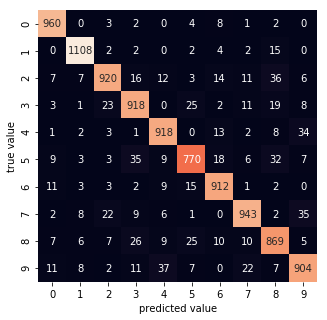

In [17]:
# import tensorflow to the environment
import tensorflow as tf
import  seaborn as sns
import  matplotlib.pyplot as plt
# Required Python Packages
#from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.examples.tutorials.mnist import input_data
# Download the MNIS dataset
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
 

 
# initializing parameters for the model
batch = 100
learning_rate = 0.01
training_epochs = 100
display_step=100
input_size=mnist.train.images.shape[1]
output_size=10
# creating placeholders
x = tf.placeholder(tf.float32, shape=[None, input_size])
y_ = tf.placeholder(tf.float32, shape=[None, output_size])
 
# creating variables
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
 
# initializing the model
y = tf.nn.softmax(tf.matmul(x,W) + b)
 
# Defining Cost Function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
# Determining the accuracy of parameters
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
 
# Implementing Gradient Descent Algorithm
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
 
# Initializing the session
with tf.Session() as sess:
    #sess.run(tf.initialize_all_variables())
    sess.run(tf.global_variables_initializer())
 
    # Creating batches of data for epochs
    for epoch in range(training_epochs):
        batch_count = int(mnist.train.num_examples / batch)
        for i in range(batch_count):
            batch_x, batch_y = mnist.train.next_batch(batch)
            # Executing the model
            sess.run([train_op], feed_dict={x: batch_x, y_: batch_y})
 
        # Print Accuracy of the model
        if epoch % display_step == 0:
            print("Epoch: ", epoch
            ,"Accuracy: ", accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
           ,"Model Execution Complete")
    yy=tf.argmax(y.eval(feed_dict={x: mnist.test.images}),1)
    ll=tf.argmax(mnist.test.labels.T)
    print(sess.run(yy))
    print(sess.run(ll))
    confusion = tf.confusion_matrix(labels=ll, predictions=yy, num_classes=10)
    
    plt.figure(figsize = (5,5))
    sns.heatmap(sess.run(confusion),square=False,annot=True,cbar=False,fmt='d')
    plt.xlabel('predicted value')
    plt.ylabel('true value')
    plt.show()

Let's create a Neural network with an input layer, 2 hidden layers (RELU as activation functions) and an output layer (softmax as activation functions).

Extracting model_data/train-images-idx3-ubyte.gz
Extracting model_data/train-labels-idx1-ubyte.gz
Extracting model_data/t10k-images-idx3-ubyte.gz
Extracting model_data/t10k-labels-idx1-ubyte.gz
Epoch:  0 Accuracy:  0.8904 Model Execution Complete
Epoch:  50 Accuracy:  0.972 Model Execution Complete
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
test accuracy 0.9751
(55000, 10)
(10000, 10)


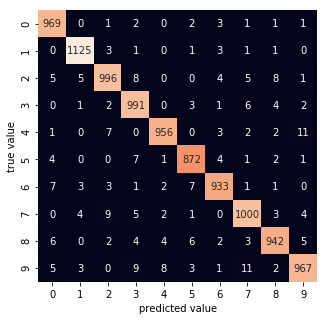

In [13]:
# import tensorflow to the environment
import tensorflow as tf
import  seaborn as sns
import  matplotlib.pyplot as plt
# Required Python Packages
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(234)

# Download the MNIS dataset
mnist = input_data.read_data_sets('model_data/', one_hot=True)
 

 
# initializing parameters for the model
batch = 200
learning_rate = 0.01
training_epochs = 100
display_step=50
input_size=mnist.train.images.shape[1]
hidden1_size=256
hidden2_size=128
output_size=10
# creating placeholders
x = tf.placeholder(tf.float32, shape=[None, input_size])
y_ = tf.placeholder(tf.float32, shape=[None, output_size])
 
# creating the neural network graph
W1 = tf.Variable(tf.truncated_normal([input_size, hidden1_size], stddev=0.1))
b1 = tf.Variable(tf.zeros([hidden1_size]))
W2 = tf.Variable(tf.truncated_normal([hidden1_size, hidden2_size],stddev=0.1))
b2 = tf.Variable(tf.zeros([hidden2_size]))
W3=tf.Variable(tf.truncated_normal([hidden2_size, output_size],stddev=0.1))
b3 = tf.Variable(tf.zeros([output_size]))
# initializing the model
y1 = tf.nn.relu(tf.add(tf.matmul(x,W1) ,b1))
y2=tf.nn.relu(tf.add(tf.matmul(y1,W2),b2))
y=tf.nn.softmax(tf.add(tf.matmul(y2,W3),b3))
 
# Defining Cost Function
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
cross_entropy =tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_,logits=y)
# Determining the accuracy of parameters
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
 
# Implementing Gradient Descent Algorithm
#train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
train_op = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy) 
# Initializing the session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
 
    # Creating batches of data for epochs
    for epoch in range(training_epochs):
        batch_count = int(mnist.train.num_examples / batch)
        for i in range(batch_count):
            batch_x, batch_y = mnist.train.next_batch(batch)
            # Executing the model
            sess.run([train_op], feed_dict={x: batch_x, y_: batch_y})
 
        # Print Accuracy of the model
        if epoch % display_step == 0:
            print("Epoch: ", epoch
            ,"Accuracy: ", accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
           ,"Model Execution Complete")
    yy=tf.argmax(y.eval(feed_dict={x: mnist.test.images}),1)
    ll=tf.argmax(mnist.test.labels.T)
    print(sess.run(yy))
    print(sess.run(ll))
    confusion = tf.confusion_matrix(labels=ll, predictions=yy, num_classes=10)
    print("test accuracy",accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
    print(mnist.train.labels.shape)
    print(mnist.test.labels.shape)
    plt.figure(figsize = (5,5))
    sns.heatmap(sess.run(confusion),square=False,annot=True,cbar=False,fmt='d')
    plt.xlabel('predicted value')
    plt.ylabel('true value')

## Exercise 2

Add one more hidden layer to above multi-layer Neural Network and test with the digit dataset. Also plot the confusion matrix.



Extracting model_data/train-images-idx3-ubyte.gz
Extracting model_data/train-labels-idx1-ubyte.gz
Extracting model_data/t10k-images-idx3-ubyte.gz
Extracting model_data/t10k-labels-idx1-ubyte.gz
Epoch:  0 Accuracy:  0.8213 Model Execution Complete
Epoch:  50 Accuracy:  0.9701 Model Execution Complete
Epoch:  100 Accuracy:  0.9727 Model Execution Complete
Epoch:  150 Accuracy:  0.9748 Model Execution Complete
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
test accuracy 0.9749
(55000, 10)
(10000, 10)


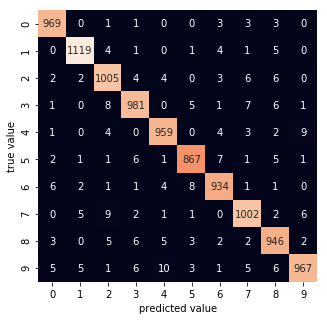

In [14]:
# import tensorflow to the environment
import tensorflow as tf
import  seaborn as sns
import  matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Required Python Packages
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(234)

def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)



# Download the MNIS dataset
mnist = input_data.read_data_sets('model_data/', one_hot=True)
 

 
# initializing parameters for the model
batch = 200
learning_rate = 0.01
training_epochs = 200
display_step=50
input_size=mnist.train.images.shape[1]
hidden1_size=256
hidden2_size=128
hidden3_size=64
output_size=10
# creating placeholders
x = tf.placeholder(tf.float32, shape=[None, input_size])
y_ = tf.placeholder(tf.float32, shape=[None, output_size])
 
# initializing the required variables
W1 = tf.Variable(tf.truncated_normal([input_size, hidden1_size], stddev=0.1))
b1 = tf.Variable(tf.zeros([hidden1_size]))
W2 = tf.Variable(tf.truncated_normal([hidden1_size, hidden2_size],stddev=0.1))
b2 = tf.Variable(tf.zeros([hidden2_size]))
W3 = tf.Variable(tf.truncated_normal([hidden2_size, hidden3_size],stddev=0.1))
b3 = tf.Variable(tf.zeros([hidden3_size]))
W4=tf.Variable(tf.truncated_normal([hidden3_size, output_size],stddev=0.1))
b4 = tf.Variable(tf.zeros([output_size]))

# builing  the model
y1 = tf.nn.relu(tf.add(tf.matmul(x,W1) ,b1))
y2=tf.nn.relu(tf.add(tf.matmul(y1,W2),b2))
y3=tf.nn.relu(tf.add(tf.matmul(y2,W3),b3))
y=tf.nn.softmax(tf.add(tf.matmul(y3,W4),b4))
 
# Defining Cost Function
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
cross_entropy =tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_,logits=y)
# Determining the accuracy of parameters
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.summary.histogram("accuracy", accuracy) 
# Implementing Gradient Descent Algorithm
#train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
#Implementing the Adam Optimizer
train_op = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy) 

# Initializing the session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
 
    # Creating batches of data for epochs
    for epoch in range(training_epochs):
        batch_count = int(mnist.train.num_examples / batch)
        for i in range(batch_count):
            #batch_x, batch_y = mnist.train.next_batch(batch)
            batch_x, batch_y=next_batch(batch, mnist.train.images, mnist.train.labels)
            # Executing the model
            sess.run([train_op], feed_dict={x: batch_x, y_: batch_y})
 
        # Print Accuracy of the model
        if epoch % display_step == 0:
            print("Epoch: ", epoch
            ,"Accuracy: ", accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
           ,"Model Execution Complete")
    yy=tf.argmax(y.eval(feed_dict={x: mnist.test.images}),1)
    ll=tf.argmax(mnist.test.labels.T)
    print(sess.run(yy))
    print(sess.run(ll))
    confusion = tf.confusion_matrix(labels=ll, predictions=yy, num_classes=10)
    print("test accuracy",accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
    print(mnist.train.labels.shape)
    print(mnist.test.labels.shape)
    plt.figure(figsize = (5,5))
    sns.heatmap(sess.run(confusion),square=False,annot=True,cbar=False,fmt='d')
    plt.xlabel('predicted value')
    plt.ylabel('true value')
 


## Exercise 3

Load Abalone.csb for classication task. Some information about the data:

- Predicting the age of abalone from physical measurements. 
- The age of-abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope 
- a boring andtime-consuming task.  
- Other measurements, which are easier to obtain are used to predict the age.  

Attributes:
  - 1   sex                 u  M F I	# Gender or Infant (I)
  - 2   length              u  (0,Inf]	# Longest shell measurement (mm)
  - 3   diameter            u  (0,Inf]	# perpendicular to length     (mm)
  - 4   height              u  (0,Inf]	# with meat in shell (mm)
  - 5   whole_weight        u  (0,Inf]	# whole abalone  (gr)
  - 6   shucked_weight      u  (0,Inf]	# weight of meat (gr)    
  - 7   viscera_weight      u  (0,Inf]	# gut weight (after bleeding) (gr)
  - 8   shell_weight        u  (0,Inf]	# after being dried (gr)
  - 9   rings               u  0..29	# +1.5 gives the age in years

In [15]:
# import tensorflow to the environment
import tensorflow as tf
import  seaborn as sns
import  matplotlib.pyplot as plt
# Required Python Packages
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(234)
import numpy as np
import pandas as pd

ddf=pd.read_csv('abalone/abalone_data.csv')
print(ddf.head())
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
# encode class values as integers
le = preprocessing.LabelEncoder() #create an encoder instance
le.fit(["M", "F","I"])             #fit the encoder with three string "M", "F" and "I"
ddf['Sex']=le.transform(ddf['Sex'])    #to transform df['driveway'] value of yes and no to 1 and 0

dupitem=[1,2,25,26,29]
for c in dupitem:
    print(c)
    iidx=ddf.index[ddf['Rings']==c].tolist()
    frame=[ddf.iloc[iidx[0]]]
    ddf=ddf.append(frame)

#ddf['Sex']=le.transform(ddf['Sex'])    #to transform df['sex'] value of M,F, I to numverical value

target=ddf['Rings']
ddf.drop('Rings',axis=1, inplace=True)
n_samples = len(ddf)
ddf = ddf.values.reshape((n_samples, -1))
Xtrain, Xtest, ytrain, ytest=train_test_split(ddf,target,random_state=0,test_size=0.2,shuffle=True)

#oytrain=tf.one_hot(ytrain.astype(int),30)
#print(oytrain.shape)


  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weigh  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7  
1
2
25
26
29


Epoch:  0 Accuracy:  0.13381124 Model Execution Complete
Epoch:  50 Accuracy:  0.15412186 Model Execution Complete
Epoch:  100 Accuracy:  0.16487455 Model Execution Complete
Epoch:  150 Accuracy:  0.20788531 Model Execution Complete
Epoch:  200 Accuracy:  0.21983273 Model Execution Complete
Epoch:  250 Accuracy:  0.22700119 Model Execution Complete
Epoch:  300 Accuracy:  0.23416965 Model Execution Complete
Epoch:  350 Accuracy:  0.23416965 Model Execution Complete
Epoch:  400 Accuracy:  0.23655914 Model Execution Complete
Epoch:  450 Accuracy:  0.23416965 Model Execution Complete
Epoch:  500 Accuracy:  0.23297492 Model Execution Complete
Epoch:  550 Accuracy:  0.24133812 Model Execution Complete
Epoch:  600 Accuracy:  0.24133812 Model Execution Complete
Epoch:  650 Accuracy:  0.23178017 Model Execution Complete
Epoch:  700 Accuracy:  0.2520908 Model Execution Complete
Epoch:  750 Accuracy:  0.2437276 Model Execution Complete
Epoch:  800 Accuracy:  0.24014337 Model Execution Complete
Ep

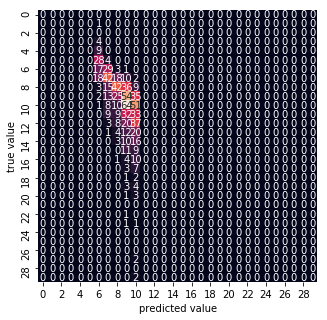

In [16]:
# import tensorflow to the environment
import tensorflow as tf
import  seaborn as sns
import  matplotlib.pyplot as plt
# Required Python Packages
from tensorflow.examples.tutorials.mnist import input_data
tf.set_random_seed(234)
np.random.seed(1235)

def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

def onehot_encoder(values):
    n_values = np.max(values) + 1
    result=np.eye(30)[values]
    return result


# initializing parameters for the model
num_examples=Xtrain.shape[0]
batch = 200
learning_rate = 0.01
training_epochs = 1000
display_step=50
input_size=Xtrain.shape[1]
hidden1_size=16
hidden2_size=64
hidden3_size=50
output_size=30
# creating placeholders
x = tf.placeholder(tf.float32, shape=[None, input_size])
y_ = tf.placeholder(tf.float32, shape=[None, output_size])
 
# initializing the required variables
W1 = tf.Variable(tf.truncated_normal([input_size, hidden1_size], stddev=0.1))
b1 = tf.Variable(tf.zeros([hidden1_size]))
W2 = tf.Variable(tf.truncated_normal([hidden1_size, hidden2_size],stddev=0.1))
b2 = tf.Variable(tf.zeros([hidden2_size]))
W3 = tf.Variable(tf.truncated_normal([hidden2_size, hidden3_size],stddev=0.1))
b3 = tf.Variable(tf.zeros([hidden3_size]))
W4=tf.Variable(tf.truncated_normal([hidden3_size, output_size],stddev=0.1))
b4 = tf.Variable(tf.zeros([output_size]))

# builing  the model
y1 = tf.nn.relu(tf.add(tf.matmul(x,W1) ,b1))
y2=tf.nn.relu(tf.add(tf.matmul(y1,W2),b2))
y3=tf.nn.relu(tf.add(tf.matmul(y2,W3),b3))
y=tf.nn.softmax(tf.add(tf.matmul(y3,W4),b4))
 
# Defining Cost Function
#cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
cross_entropy =tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_,logits=y)
# Determining the accuracy of parameters
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
tf.summary.histogram("accuracy", accuracy) 
# Implementing Gradient Descent Algorithm
#train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)
#Implementing the Adam Optimizer
train_op = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy) 
oytrain=onehot_encoder(ytrain.astype(int))
oytest=onehot_encoder(ytest.astype(int))


# Initializing the session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
 
    # Creating batches of data for epochs
    for epoch in range(training_epochs):
        batch_count = int(num_examples / batch)
        for i in range(batch_count):
            batch_x, batch_y = next_batch(batch,Xtrain.tolist(),oytrain.tolist())
            # Executing the model
            sess.run([train_op], feed_dict={x: batch_x, y_: batch_y})
 
        # Print Accuracy of the model
        if epoch % display_step == 0:
            print("Epoch: ", epoch
            ,"Accuracy: ", accuracy.eval(feed_dict={x: Xtest, y_: oytest})
           ,"Model Execution Complete")
    yy=tf.argmax(y.eval(feed_dict={x: Xtest}),1)
   
    print(sess.run(yy))
 
    confusion = tf.confusion_matrix(labels=ytest, predictions=yy, num_classes=30)
    print("test accuracy",accuracy.eval(feed_dict={x: Xtest, y_: oytest}))
    plt.figure(figsize = (5,5))
    sns.heatmap(sess.run(confusion),square=False,annot=True,cbar=False,fmt='d')
    plt.xlabel('predicted value')
    plt.ylabel('true value')
 


